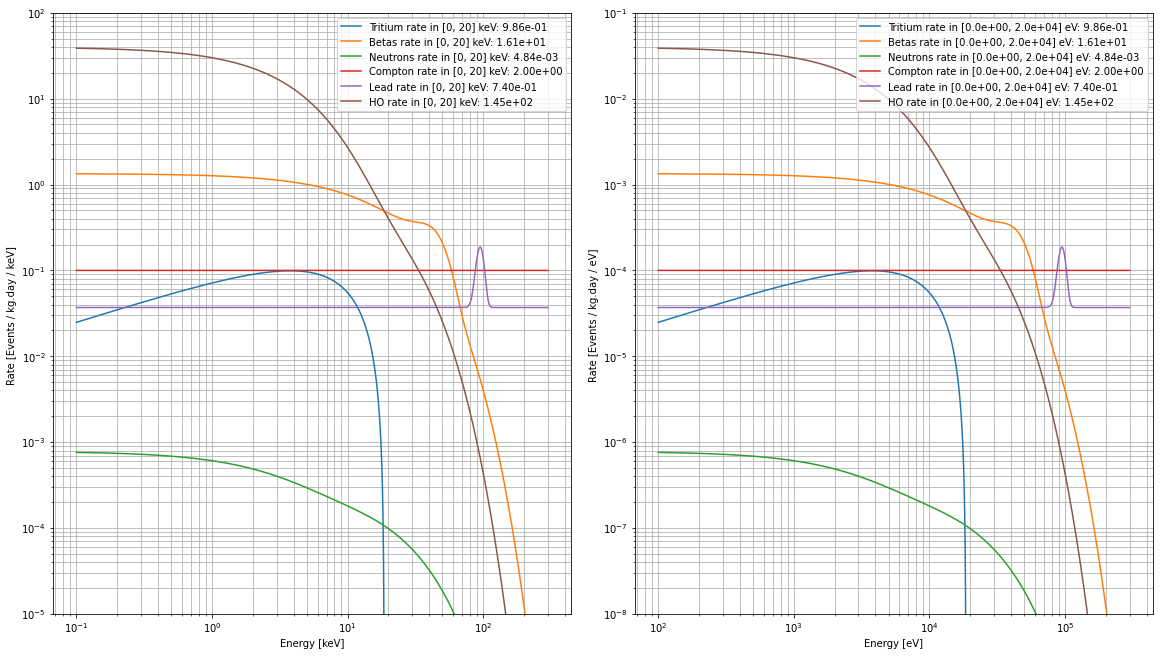

In [1]:
from Backgrounds_Libraries import *
from Tools_Libraries import *
import matplotlib.pyplot as plt

ft_keV = lambda x : EDWfuncTRITIUM(x,"keV",1)
ft_eV  = lambda x : EDWfuncTRITIUM(x,"eV",1)

fb_keV = lambda x : EDWfuncBETA(x,"keV",1)
fb_eV  = lambda x : EDWfuncBETA(x,"eV",1)

fn_keV = lambda x : EDWfuncNEUTRON(x,"keV",1)
fn_eV  = lambda x : EDWfuncNEUTRON(x,"eV",1)

fc_keV = lambda x : EDWfuncCOMPTON(x,"keV",1)
fc_eV  = lambda x : EDWfuncCOMPTON(x,"eV",1)

fl_keV = lambda x : EDWfuncLEAD(x,"keV",1)
fl_eV  = lambda x : EDWfuncLEAD(x,"eV",1)

fh_keV = lambda x : EDWfuncHEATONLY(x,"keV",1)
fh_eV  = lambda x : EDWfuncHEATONLY(x,"eV",1)

listfunc_names = ["Tritium","Betas","Neutrons","Compton","Lead",'HO']
listfunc_keV = [ft_keV,fb_keV,fn_keV,fc_keV,fl_keV,fh_keV]
listfunc_eV =  [ft_eV ,fb_eV ,fn_eV, fc_eV, fl_eV , fh_eV]

emin_keV = 0
emax_keV = 20
emin_eV = emin_keV * 1000
emax_eV = emax_keV * 1000

plotemin_keV = 1e-1
plotemax_keV = 300
plotemin_eV = plotemin_keV * 1000
plotemax_eV = plotemax_keV * 1000

nptx = 10000
xx_keV = np.linspace(plotemin_keV,plotemax_keV,nptx)
xx_eV = np.linspace(plotemin_eV,plotemax_eV,nptx)

fig,axs = plt.subplots(figsize=(16,9),ncols=2,constrained_layout=True)
ax1,ax2 = axs

for i,name in enumerate(listfunc_names):
    func_keV = listfunc_keV[i]
    func_eV = listfunc_eV[i]
    ratekeV = TF1Integral(func_keV,emin_keV,emax_keV,10000)
    rateeV = TF1Integral(func_eV, emin_eV, emax_eV,10000)
    #print(f"{name} rate : {ratekeV:.5f}  vs  {rateeV:.5f}")
    ax1.loglog(xx_keV,func_keV(xx_keV),label=f"{name} rate in [{emin_keV}, {emax_keV}] keV: {ratekeV:.2e}")
    ax2.loglog(xx_eV,func_eV(xx_eV),label=f"{name} rate in [{emin_eV:.1e}, {emax_eV:.1e}] eV: {rateeV:.2e}")
    
ax1.set_xlabel("Energy [keV]")
ax1.set_ylabel("Rate [Events / kg.day / keV] ")
ax1.set_ylim((1e-5,1e2))

ax2.set_xlabel("Energy [eV]")
ax2.set_ylabel("Rate [Events / kg.day / eV] ")
i,j = ax1.get_ylim()
ax2.set_ylim((i/1000,j/1000))
for ax in axs:
    ax.grid(which='both')
    leg = ax.legend(loc='upper right')
    
    

In [2]:
import pandas as pd
dicfunc = {"Tritium" : [ft_keV,ft_eV],
           "Betas"   : [fb_keV,fb_eV],
           "Neutrons": [fn_keV,fn_eV],
           "Compton" : [fc_keV,fc_eV],
           "Lead"    : [fl_keV,fl_eV]}

dt = pd.DataFrame(dicfunc)
dt.rename(index={0: "func_keV", 1: "func_eV"})
dt.head()

,Tritium,Betas,Neutrons,Compton,Lead
0,<function <lambda> at 0x7f168edfcc20>,<function <lambda> at 0x7f168e2179e0>,<function <lambda> at 0x7f168e217c20>,<function <lambda> at 0x7f168e217e60>,<function <lambda> at 0x7f168e2190e0>
1,<function <lambda> at 0x7f168f160ef0>,<function <lambda> at 0x7f168e217b00>,<function <lambda> at 0x7f168e217d40>,<function <lambda> at 0x7f168e217f80>,<function <lambda> at 0x7f168e219200>
